# Lab 05: Visual Reasoning with o-series models

This notebook explores the visual reasoning capabilities of o-series models, particularly focusing on its ability to understand and process information from both text and images. 

We will demonstrate how these models can be used to analyze entity-relationship diagrams (ERDs), generate SQL queries, and even create synthetic data.

In [38]:
## This is a Test Code
"""Run this model in Python

> pip install openai
"""
import os
from openai import OpenAI
from dotenv import load_dotenv
from IPython.display import display, Markdown, HTML, Image

# Load environment variables from .env file
load_dotenv()

# To authenticate with the model you will need to generate a personal access token (PAT) in your GitHub settings. 
# Create your PAT token by following instructions here: https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens
client = OpenAI(
    base_url="https://models.inference.ai.azure.com",
    api_key=os.environ["githubtoken1"],
)

### 5.1 This lab is designed to explore the capabilities of visual reasoning using AI models. 

**Floor Plan Analysis**: In this section, you will use AI models to analyze a floor plan image, extract architectural insights, and evaluate the design's usability and efficiency. You will compare the performance of different models, such as `o1` and `gpt-4o`, in understanding spatial layouts and providing meaningful feedback.



#### Floor Plan Analytic Requirements

1.  **Multi-Unit Room Analysis**

    *   Ensures efficient space utilization across multiple apartments.
    *   Identifies room adjacency issues that impact livability.
    *   Predicts movement congestion based on daily activities.
2.  **Vertical & Horizontal Circulation**

    *   Evaluates ease of movement within and between units.
    *   Identifies potential bottlenecks in the common breezeway and entry points.
    *   Improves accessibility for elderly, disabled, and emergency evacuation.
3.  **Storage & Utility Efficiency**

    *   Determines if storage is adequate and conveniently placed.
    *   Improves clutter management for better livability.
    *   Ensures laundry placement minimizes inconvenience in shared units.
4.  **Bathroom & Plumbing Optimization**

    *   Reduces construction costs by analyzing shared plumbing walls.
    *   Minimizes water waste and pipe redundancy.
    *   Prevents noise disturbances from poorly positioned bathrooms.
5.  **Zoning & Functional Separation**

    *   Enhances privacy between bedrooms, living areas, and neighboring units.
    *   Prevents noise conflicts between high-traffic and quiet spaces.
    *   Supports balanced living environments for diverse occupants (families, professionals, elderly).
6.  **Entry, Exit, and Outdoor Accessibility**

    *   Evaluates safety and security of entry points.
    *   Maximizes natural light and ventilation through patio/breezeway access.
    *   Enhances outdoor usability for relaxation, dining, or storage needs.


In [ ]:
structured_prompt = (
    "<instructions>"
    "You are an expert in architectural reasoning and spatial analysis, specializing in multi-unit residential designs. "
    "Examine the provided floor plan and extract deep insights into spatial organization, functional efficiency, and livability. "
    "Apply reasoning-based evaluation to highlight superior analytical capabilities in OpenAI’s O1 model over GPT-4o. "
    "Break down the analysis into the following sections:\n\n"
    
    "1. **Multi-Unit Room Analysis**\n"
    "- Identify and list all rooms in each unit, specifying their approximate dimensions.\n"
    "- Categorize rooms into private (bedrooms, bathrooms), semi-private (living rooms, dining areas), and shared utility spaces (kitchen, laundries, storage rooms).\n"
    "- Analyze how well the spatial arrangement supports comfortable living for different resident demographics (e.g., families, elderly occupants, remote workers).\n"
    "- Use a movement flow model to assess ease of access between rooms and predict congestion points.\n"

    "2. **Vertical & Horizontal Circulation**\n"
    "- Identify how the common breezeway and staircases contribute to unit accessibility.\n"
    "- Evaluate **entry-to-unit travel distances** and potential congestion points at high-traffic times.\n"
    "- Assess corridor width, doorway placements, and overall circulation efficiency using graph-based movement simulations.\n"
    
    "3. **Storage & Utility Efficiency**\n"
    "- List all dedicated storage areas (closets, W.I.C., storage rooms, laundry areas) in each unit.\n"
    "- Assess their spatial distribution and convenience based on room proximity.\n"
    "- Compute **storage-to-living-space ratio** to measure efficiency.\n"

    "4. **Bathroom & Plumbing Optimization**\n"
    "- Identify all bathrooms and evaluate their adjacency to bedrooms and shared spaces.\n"
    "- Analyze the **plumbing efficiency index** (shared walls reducing construction costs and water line redundancy).\n"
    "- Predict potential **noise interference** from bathrooms into adjacent living spaces.\n"
    
    "5. **Zoning & Functional Separation**\n"
    "- Differentiate between **public zones (living, dining), semi-private zones (kitchen, laundry), and private zones (bedrooms, bathrooms)**.\n"
    "- Evaluate how well privacy is maintained between adjacent units (wall thickness, layout buffering).\n"
    "- Identify potential noise and activity conflicts between units (e.g., a living room sharing a wall with a neighbor's bedroom).\n"

    "6. **Entry, Exit, and Outdoor Accessibility**\n"
    "- Identify all primary and secondary entry/exit points.\n"
    "- Evaluate how patios, storage rooms, and breezeways connect to indoor spaces.\n"
    "- Assess **natural light access** and outdoor usability for relaxation, dining, or socialization.\n"


    "7. **Export in Neatly Formatted HTML Report**\n"
    "- Present a structured architectural analysis using tables, heatmaps, and path diagrams.\n"
    "- Include **movement flow graphs, noise heatmaps, and congestion models** to showcase deep analytical insights.\n"

    "Provide an expert evaluation of the layout’s usability, efficiency, and livability, while pinpointing both strengths and areas for improvement. "
    "Highlight where AI-driven spatial intelligence can enhance future designs."
    "</instructions>"
)
print(structured_prompt)



<instructions>You are an expert in analyzing residential floor plans. Examine the provided two-story house plan and extract key insights, focusing on spatial organization, functional areas, and structural relationships. Break down the analysis into the following sections:

1. **Room Analysis**
- Identify and list all rooms on each floor, specifying their approximate dimensions.
- Note which rooms are connected and describe the flow of movement between spaces.
2. **Vertical Circulation**
- Identify staircases and describe how they connect the floors.
- Determine accessibility and potential bottlenecks in movement.
3. **Storage & Utility Spaces**
- List all dedicated storage areas (closets, storage rooms, utility spaces).
- Explain their distribution and accessibility.
4. **Bathroom & Plumbing Layout**
- Identify all bathrooms and their locations.
- Note the proximity of plumbing fixtures to optimize water usage efficiency.
5. **Zoning & Functional Separation**
- Differentiate private sp

In [ ]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")



def vision(file_path,prompt,model,json_mode=False):

    base64_image = encode_image(file_path)

    if json_mode:

        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/png;base64,{base64_image}"}
                    }
                ]}
            ],
            response_format={ "type": "json_object" }
        )

    else:
        
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {
                        "url": f"data:image/png;base64,{base64_image}"}
                    }
                ]}
            ],
        )

    return response

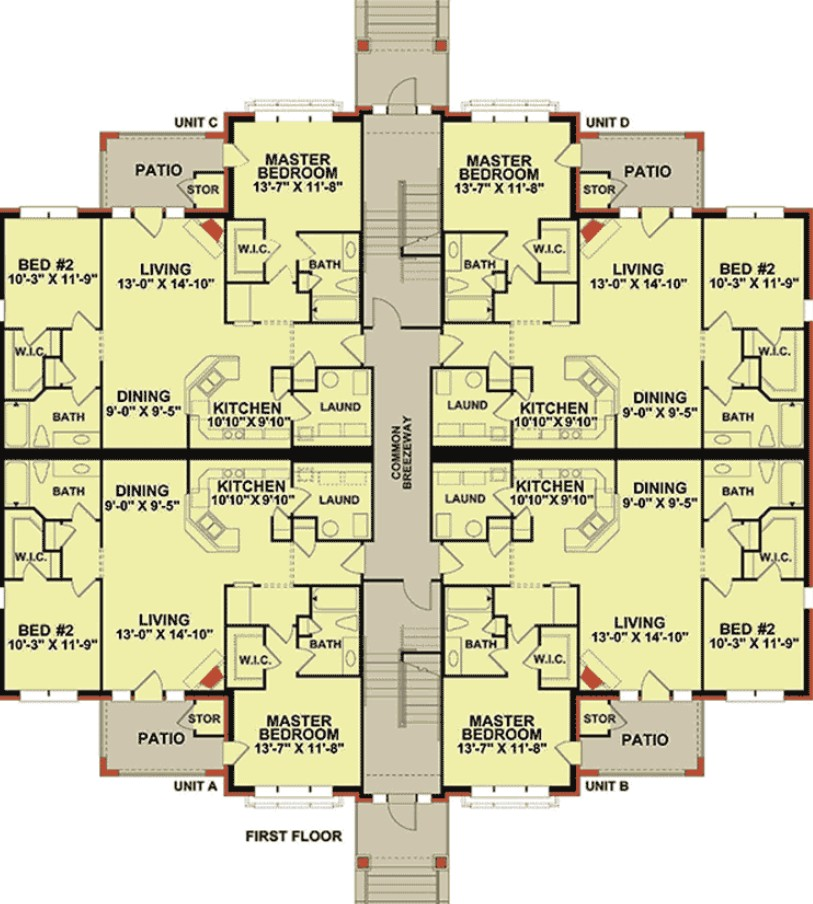

In [ ]:
image_filepath = 'Data/house_plan_2.jpg'

display(Image(image_filepath))

o1_response =  vision(file_path=image_filepath
                        ,model='o1'
                        ,prompt=structured_prompt
                        ,json_mode=False)

### Extract the content from the o1 response into HTML file

In [ ]:
html_content_o1 = o1_response.choices[0].message.content

# Define the file path where you want to save the HTML content
file_path = 'floorplan_analysis_o1.html'

# Write the HTML content to the file
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content_o1)

print(f"HTML content has been written to {file_path}")

HTML content has been written to floorplan_analysis_o1.html


### Extract the content from the gpt4o response into HTML file

In [ ]:
gpt4o_response =  vision(file_path=image_filepath
                        ,model='gpt-4o'
                        ,prompt=structured_prompt
                        ,json_mode=False)

html_content_gpt4o = gpt4o_response.choices[0].message.content

# Define the file path where you want to save the HTML content
file_path = 'floorplan_analysis_gpt4o.html'

# Write the HTML content to the file
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content_gpt4o)

print(f"HTML content has been written to {file_path}")

HTML content has been written to floorplan_analysis_gpt4o.html


### Evaluate the response from GPT-4o and o1

In [ ]:
gpt4o=gpt4o_response.choices[0].message.content
o1=o1_response.choices[0].message.content

prompt = (
    f"Given the following structured prompt:\n{structured_prompt}\n"
    f"Evaluate and compare the outputs from GPT-4o:\n{gpt4o}\n"
    f"and from o1:\n{o1}\n"
    "In the analysis of the provided floor plan image, which model performed better in terms of accuracy and why, Give a detailed analysis and comparison of evaluations?"
)

o1_comparison = vision(
    file_path=image_filepath,
    model="o1",
    prompt=prompt,
    json_mode=False
)

In [ ]:
display(HTML('<div style="background-color: #f0fff8; padding: 10px; border-radius: 5px; border: 1px solid #d3d3d3;"></hr><h2>🔽 &nbsp; Markdown Output – Beginning</h2></hr></div>'))
display(Markdown(o1_comparison.choices[0].message.content))
display(HTML('<div style="background-color: #fff4f4; padding: 10px; border-radius: 5px; border: 1px solid #d3d3d3;"></hr><h2>🔼 &nbsp; Markdown Output – End</h2></hr></div>'))

Below is a comparative assessment of the two HTML‐formatted analyses (GPT‐4o vs. o1) measured against the actual floor plan diagram:

1. Treatment of the Number of Bathrooms  
   • GPT‐4o: States “one full bath per unit.”  
   • o1: Correctly identifies “two bathrooms per unit” (one en‐suite to the master bedroom and another accessible to guests/bedroom #2).  

   This is the most significant discrepancy. The floor plan clearly shows two bathrooms in each unit, so o1 is accurate while GPT‐4o is not.

2. Overall Unit Count and Layout Details  
   • GPT‐4o: Refers to the first floor as “Units A & B” and the second floor as “Units C & D,” mirroring the plan correctly.  
   • o1: Similarly references that each floor has two units off a central breezeway, also correct.  

   Both models correctly capture the general organization (four total units, two on each level).

3. Room Dimensions and Labels  
   • GPT‐4o: Accurately cites bedroom, kitchen, dining, and living room dimensions and notes walk‐in closets (W.I.C.).  
   • o1: Echoes the same approximate dimensions and also calls out walk‐in closets as well as the standard closet in bedroom #2.  

   In terms of published measurements and the naming of spaces, both models align fairly well with the plan.

4. Storage & Utility Provisions  
   • GPT‐4o: Notes walk‐in closets, bathroom cabinets, and a “laundry closet” near the kitchen or a hallway space.  
   • o1: Provides a similar breakdown, adding more specificity about outdoor storage (~3′ × 5′ patio storage closets).  

   Both do a good job describing how storage is integrated, with o1 giving slightly more detail on patio‐closet size.

5. Circulation and Zoning  
   • GPT‐4o: Identifies a single, centrally located staircase and the possibility of bottlenecks.  
   • o1: Same observation, emphasizing the possibility of congestion but noting simpler wayfinding.  

   The two analyses are consistent that the central stair/breezeway design consolidates vertical and horizontal circulation.

6. Notable Strengths and Limitations  
   • GPT‐4o: Praises efficient use of indoor space, highlights shared plumbing lines, and points out the single staircase as a possible choke point.  
   • o1: Affirms communal versus private zone separation, emphasizes the open‐concept living areas, and calls out potential noise or traffic issues in the central corridor.  

   Both identify strengths such as efficient plumbing layouts and good zoning, though o1 delves briefly into the need for proper sound insulation.

────────────────────────────────────────────────────────────────

Conclusion:  
While both models capture the general organization of the plan with correct room sizes and a strong sense of flow, o1 provides a more faithful representation of the actual layout—particularly in identifying that each unit has two bathrooms rather than just one. Because of this key detail (and its additional commentary on patio storage and insulation concerns), o1’s analysis more accurately reflects what is shown in the floor plan.

### 5.2 This lab demonstrates how reasoning models can analyze entity-relationship diagrams (ERDs), generate SQL queries, and create synthetic data. 

**ERD Analysis, SQL Generation, and Synthetic Data Generation**: This section focuses on using AI models to analyze ERDs, generate SQL queries, and create synthetic data. You will also explore floor plan analysis, comparing the performance of models like `o1` and `gpt-4o` in understanding spatial layouts and providing meaningful feedback.


### Step 1. Process the ERD Image

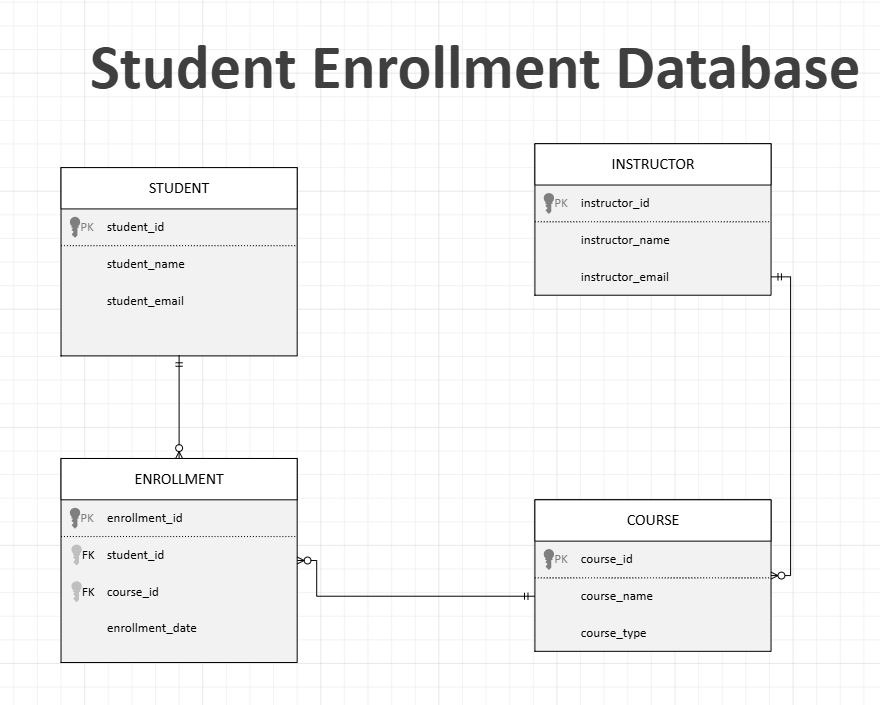

In [56]:
image_filepath = 'Data/ERD.PNG'

display(Image(image_filepath))

### Step 2 Create an ERD expert prompt

In [57]:
structured_prompt = ("<instructions>You are an expert in analyzing entity-relationship diagrams (ERDs). "
                     "Extract the schema structure and relationships from the provided diagram. Represent the information in the following structured JSON format:\n"
                     "- entities: An array where each element contains:\n"
                     "  - entityName: The name of the entity\n"
                     "  - attributes: An array of attribute names in the entity\n"
                     "- relationships: An array where each element contains:\n"
                     "  - relationshipName: The name of the relationship (if specified)\n"
                     "  - fromEntity: The source entity in the relationship\n"
                     "  - toEntity: The target entity in the relationship\n"
                     "  - cardinality: The cardinality between entities (e.g., 1:1, 1:*, *:*)\n"
                     "  - attributes: An array of attributes specific to the relationship (if any)\n"
                     "Only use the information explicitly provided in the ERD."
                     "</instructions>")
print(structured_prompt)


<instructions>You are an expert in analyzing entity-relationship diagrams (ERDs). Extract the schema structure and relationships from the provided diagram. Represent the information in the following structured JSON format:
- entities: An array where each element contains:
  - entityName: The name of the entity
  - attributes: An array of attribute names in the entity
- relationships: An array where each element contains:
  - relationshipName: The name of the relationship (if specified)
  - fromEntity: The source entity in the relationship
  - toEntity: The target entity in the relationship
  - cardinality: The cardinality between entities (e.g., 1:1, 1:*, *:*)
  - attributes: An array of attributes specific to the relationship (if any)
Only use the information explicitly provided in the ERD.</instructions>


In [58]:
o1_response =  vision(file_path=image_filepath
                        ,model='o1'
                        ,prompt=structured_prompt
                        ,json_mode=True)
print(o1_response.choices[0].message.content)

{
  "entities": [
    {
      "entityName": "STUDENT",
      "attributes": [
        "student_id",
        "student_name",
        "student_email"
      ]
    },
    {
      "entityName": "INSTRUCTOR",
      "attributes": [
        "instructor_id",
        "instructor_name",
        "instructor_email"
      ]
    },
    {
      "entityName": "COURSE",
      "attributes": [
        "course_id",
        "course_name",
        "course_type"
      ]
    },
    {
      "entityName": "ENROLLMENT",
      "attributes": [
        "enrollment_id",
        "student_id",
        "course_id",
        "enrollment_date"
      ]
    }
  ],
  "relationships": [
    {
      "relationshipName": "",
      "fromEntity": "STUDENT",
      "toEntity": "ENROLLMENT",
      "cardinality": "1:*",
      "attributes": []
    },
    {
      "relationshipName": "",
      "fromEntity": "COURSE",
      "toEntity": "ENROLLMENT",
      "cardinality": "1:*",
      "attributes": []
    },
    {
      "relationshipName": ""

In [59]:
import json

# Extract the content from the o1_response
o1_response_content = o1_response.choices[0].message.content

# Convert the content to a dictionary
o1_response_dict = json.loads(o1_response_content)

# Write the dictionary to a JSON file
with open('o1_response.json', 'w') as json_file:
    json.dump(o1_response_dict, json_file, indent=4)

print("erd.json")

erd.json


### Step 3: Printing the o1 response

In [60]:

erd_data = json.loads(o1_response.choices[0].message.content)


erd_data

{'entities': [{'entityName': 'STUDENT',
   'attributes': ['student_id', 'student_name', 'student_email']},
  {'entityName': 'INSTRUCTOR',
   'attributes': ['instructor_id', 'instructor_name', 'instructor_email']},
  {'entityName': 'COURSE',
   'attributes': ['course_id', 'course_name', 'course_type']},
  {'entityName': 'ENROLLMENT',
   'attributes': ['enrollment_id',
    'student_id',
    'course_id',
    'enrollment_date']}],
 'relationships': [{'relationshipName': '',
   'fromEntity': 'STUDENT',
   'toEntity': 'ENROLLMENT',
   'cardinality': '1:*',
   'attributes': []},
  {'relationshipName': '',
   'fromEntity': 'COURSE',
   'toEntity': 'ENROLLMENT',
   'cardinality': '1:*',
   'attributes': []},
  {'relationshipName': '',
   'fromEntity': 'INSTRUCTOR',
   'toEntity': 'COURSE',
   'cardinality': '1:*',
   'attributes': []}]}

### Step 4: Generate SQL Queries to Business Questions from ERD Data

In [61]:
analysis_prompt = ("<instructions>You are an ERD expert assistant. Your role is to analyze entity-relationship diagrams (ERDs) in json format "
                   "and generate SQL queries that business users can use to query the database effectively. Ensure the queries are "
                   "easy to understand, optimized for performance, and written in a way that aligns with the structure of the provided ERD. "
                   "Additionally, explain the purpose of each query in simple terms for better comprehension.</instructions>\n"
                   f"<erd_data>{erd_data}</erd_data>\n")


### Using o3 mini to generate SQL queries from ERD

In [63]:
messages = [{
    "role": "user",
    "content": analysis_prompt + "<question>Which student has the most number of enrollments and what is the most popular course?</question>"
}]

response_o3_sql = client.chat.completions.create(model="o3-mini",
                                                 reasoning_effort="high",
                                          messages=messages)


In [64]:
sql_query = response_o3_sql.choices[0].message.content

display(HTML('<div style="background-color: #f0fff8; padding: 10px; border-radius: 5px; border: 1px solid #d3d3d3;"></hr><h2>🔽 &nbsp; Markdown Output – Beginning</h2></hr></div>'))
display(Markdown(response_o3_sql.choices[0].message.content))
display(HTML('<div style="background-color: #fff4f4; padding: 10px; border-radius: 5px; border: 1px solid #d3d3d3;"></hr><h2>🔼 &nbsp; Markdown Output – End</h2></hr></div>'))

Below are two separate SQL queries. The first query finds the student with the highest number of enrollments, and the second query identifies the course with the most enrollments (i.e. the most popular course).

──────────────────────────────
Query 1 – Find the Student with the Most Enrollments:
──────────────────────────────
SELECT 
  s.student_id,
  s.student_name,
  COUNT(e.enrollment_id) AS enrollment_count
FROM STUDENT s
JOIN ENROLLMENT e 
  ON s.student_id = e.student_id
GROUP BY s.student_id, s.student_name
ORDER BY enrollment_count DESC
LIMIT 1;

Explanation:
• This query joins the STUDENT table with the ENROLLMENT table using the student_id.
• It groups the results by student to count how many enrollments each student has.
• By ordering the count in descending order and limiting the output to 1, it returns the student with the highest enrollment count.

──────────────────────────────
Query 2 – Find the Most Popular Course:
──────────────────────────────
SELECT 
  c.course_id,
  c.course_name,
  COUNT(e.enrollment_id) AS enrollment_count
FROM COURSE c
JOIN ENROLLMENT e 
  ON c.course_id = e.course_id
GROUP BY c.course_id, c.course_name
ORDER BY enrollment_count DESC
LIMIT 1;

Explanation:
• This query joins the COURSE table with the ENROLLMENT table using the course_id.
• It groups the results by course to calculate the number of enrollments per course.
• Ordering the results in descending order by this count and limiting to 1 returns the course that has the most enrollments (i.e. the most popular course).

These queries are optimized by leveraging JOINs and GROUP BY clauses, ensuring that the database only processes the necessary records and returns a clear, single result for each question.

### Step 5: Validation of SQL Prompt

In [70]:
sql_validation_prompt = (
    "<instructions>"
    "You are an SQL validation expert. Your role is to analyze the provided Entity-Relationship Diagram (ERD), business question, and SQL query to ensure correctness, efficiency, and adherence to best practices. "
    "Validate that the query correctly answers the business question while adhering to the schema constraints, foreign key relationships, and indexing strategies. "
    "Identify any errors, inefficiencies, or missing joins and suggest improvements if necessary."
    "</instructions>\n"
    f"<erd_data>{erd_data}</erd_data>\n"
    "<business_question>\n"
    "Find the Student with the Most Enrollments"
    "</business_question> Extract the sql query from below\n\n"
    "<sql_query> "
    "{sql_query}\n"
    "</sql_query>\n"
)



In [71]:
messages = [{
    "role": "user",
    "content": sql_validation_prompt
}]

sql_validation = client.chat.completions.create(model="o3-mini",
                                          messages=messages)

In [72]:
display(HTML('<div style="background-color: #f0fff8; padding: 10px; border-radius: 5px; border: 1px solid #d3d3d3;"></hr><h2>🔽 &nbsp; Markdown Output – Beginning</h2></hr></div>'))
display(Markdown(sql_validation.choices[0].message.content))
display(HTML('<div style="background-color: #fff4f4; padding: 10px; border-radius: 5px; border: 1px solid #d3d3d3;"></hr><h2>🔼 &nbsp; Markdown Output – End</h2></hr></div>'))

Below is an analysis of a correct SQL solution for the business question “Find the Student with the Most Enrollments” based on the given ERD:

───────────────────────────────  
Analysis  
───────────────────────────────  
1. Schema Overview:  
 • STUDENT has: student_id, student_name, student_email  
 • ENROLLMENT has: enrollment_id, student_id, course_id, enrollment_date  
  – The relationship between STUDENT and ENROLLMENT is 1:* (each student can have many enrollments).  

2. Business Question:  
 • We need to identify the student (or student details) having the highest number of enrollments.

3. SQL Query Approach:  
 • Join STUDENT to ENROLLMENT on student_id.  
 • Group by student_id (and any additional fields, such as student_name) to count enrollments.  
 • Order the results in descending order by the enrollment count.  
 • Limit the result to one record to return only the student with the most enrollments.

4. Example Query:  

  SELECT s.student_id, s.student_name, COUNT(e.enrollment_id) AS enrollment_count  
  FROM STUDENT s  
  JOIN ENROLLMENT e  
   ON s.student_id = e.student_id  
  GROUP BY s.student_id, s.student_name  
  ORDER BY enrollment_count DESC  
  LIMIT 1;

───────────────────────────────  
Validation and Comments  
───────────────────────────────  
• The join between STUDENT and ENROLLMENT is valid because STUDENT.student_id is referenced by ENROLLMENT.student_id.  
• Grouping by s.student_id and s.student_name complies with SQL standards (especially in systems requiring all non-aggregated selected columns to appear in GROUP BY).  
• Ordering by enrollment_count in descending order and limiting to 1 correctly picks the student with the most enrollments.  
• Indexing strategies:  
 – It is advisable that ENROLLMENT.student_id is indexed for efficient join performance on the foreign key.  
• Note on Ties:  
 – If more than one student can have the same maximum enrollment count and you wish to include them all, consider using a subquery or window function (like RANK or DENSE_RANK) instead of LIMIT 1.

───────────────────────────────  
Final SQL Query Answer  
───────────────────────────────  

Extracted SQL Query:

SELECT s.student_id, s.student_name, COUNT(e.enrollment_id) AS enrollment_count
FROM STUDENT s
JOIN ENROLLMENT e
  ON s.student_id = e.student_id
GROUP BY s.student_id, s.student_name
ORDER BY enrollment_count DESC
LIMIT 1;

───────────────────────────────  
Conclusion  
───────────────────────────────  
The query above is correct, efficient, and adheres to best practices given the schema constraints and relationships. It correctly identifies the student with the most enrollments based on the ERD.

### Step 6: Generate Synthetic Data from the ERD

In [68]:
course_data_generation_prompt = (
    "<instructions>"
    "You are a synthetic data generation expert. Your role is to generate high-quality synthetic data for the 'Course' table based on the provided entity-relationship diagram (ERD). "
    "Ensure that the generated data is diverse, realistic, and adheres to all constraints, including primary keys, foreign keys, data types, and business rules. "
    "The data should be suitable for testing, analysis, and demonstration purposes. Avoid duplicate or unrealistic entries. "
    "If the table has relationships with other tables, ensure that foreign key values match valid entries from related tables."
    "</instructions>\n"
    f"<erd_data>{erd_data}</erd_data>\n"
    "<data_requirements>"
    "1. Generate at least 10 unique course records in a tabular format."
    "2. Ensure that course names are varied and relevant to different fields of study (e.g., Computer Science, Business, Arts, etc.)."
    "3. Include all attributes from the ERD"
    "4. Course IDs in the format 'C###' where '###' is a unique 3-digit number."
    "5. Course Type should fall in Computer Science, Business, Arts, Music."
    "</data_requirements>\n"
)


In [69]:
messages = [{
    "role": "user",
    "content": course_data_generation_prompt 
}]

response_o3 = client.chat.completions.create(model="o3-mini",
                                          messages=messages)

print(response_o3.choices[0].message.content)

+-----------+------------------------------------------+-------------------+
| course_id | course_name                              | course_type       |
+-----------+------------------------------------------+-------------------+
| C101      | Introduction to Programming              | Computer Science  |
| C102      | Data Structures and Algorithms           | Computer Science  |
| C103      | Business Management Fundamentals         | Business          |
| C104      | Corporate Finance                        | Business          |
| C105      | Renaissance Art History                  | Arts              |
| C106      | Digital Photography                      | Arts              |
| C107      | Music Theory and Composition             | Music             |
| C108      | Jazz Improvisation                       | Music             |
| C109      | Cybersecurity Essentials                 | Computer Science  |
| C110      | Entrepreneurship and Innovation          | Business          |